# Task2 : Predicting future stock price

In [2]:

import pandas as pd # pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt # matplotlib is used for plotting graphs
import yfinance as yf # yfinance is used to fetch financial data from Yahoo Finance

In [3]:
# Importing others libraries that will be used throughout the task

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# Intructions to follow :
1. Select a stock (e.g., Apple, Tesla). 
2. Load historical data using the yfinance library. 
3. Use features like Open, High, Low, and Volume to predict the next Close price. 
4. Train a Linear Regression or Random Forest model. 
5. Plot actual vs predicted closing prices for comparison. 

In [4]:
# Selecting the stock data for Apple Inc.
stock = yf.download("AAPL", start="2020-01-01", end="2024-12-31")


C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10000\3705168428.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [5]:
stock.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


In [6]:
stock.columns = ['Open', 'High', 'Low', 'Close', 'Volume']


In [7]:
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


In [8]:
# Step 2: Create target column (next day's close)
stock['Target'] = stock['Close'].shift(-1)
stock.dropna(inplace=True)

In [9]:
features = ['Open', 'High', 'Low', 'Volume']
X = stock[features].copy()  # ✅ Only keep needed columns
y = stock['Target']

In [10]:
y.head()

Date
2020-01-02    71.847110
2020-01-03    71.034709
2020-01-06    72.497522
2020-01-07    71.849548
2020-01-08    74.286749
Name: Target, dtype: float64

In [11]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# Column transformer
trf1 = ColumnTransformer([
    ('scale', StandardScaler(), features)
    
], remainder = 'passthrough')


In [13]:
model = RandomForestRegressor(n_estimators=100, random_state = 42)

In [14]:
pipe = Pipeline([
    ('trf1', trf1),
    ('model', model)
])

In [15]:
# Train the model
pipe.fit(X_train, Y_train)

,steps,"[('trf1', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scale', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
# predict
y_pred = pipe.predict(X_test)

In [17]:
y_pred

array([142.92526609,  76.87806497,  60.15138442,  60.40935073,
       220.69923202, 152.53925765, 170.5438008 , 155.10958185,
       226.19874956, 183.89670337, 148.85436304, 174.15089398,
       117.88550508, 170.71685345, 171.01467739, 122.51263004,
       188.66549678, 142.4419035 , 143.4463913 , 149.12113595,
       212.90581097, 143.73465258, 116.35048637, 172.52510923,
       170.09344161, 224.55191251, 139.51447203, 125.98997435,
       169.71327979,  70.67675901, 179.08665001, 130.31013014,
       191.64675171, 151.15452179, 190.70599713, 166.89655761,
       117.5537437 , 112.80456721, 181.10300388, 123.25413248,
       226.99082189, 250.80708879, 168.06586007,  87.71222143,
       157.48751387, 172.15705815, 133.79619614,  76.89177951,
       168.16741483, 142.32577902, 157.55783714, 127.50718836,
       145.98049924, 185.29661305, 120.2910511 , 124.3259612 ,
       109.6934878 , 112.42092619, 226.15679363, 134.62673044,
       169.11778505, 121.15454922, 146.86427775,  69.27

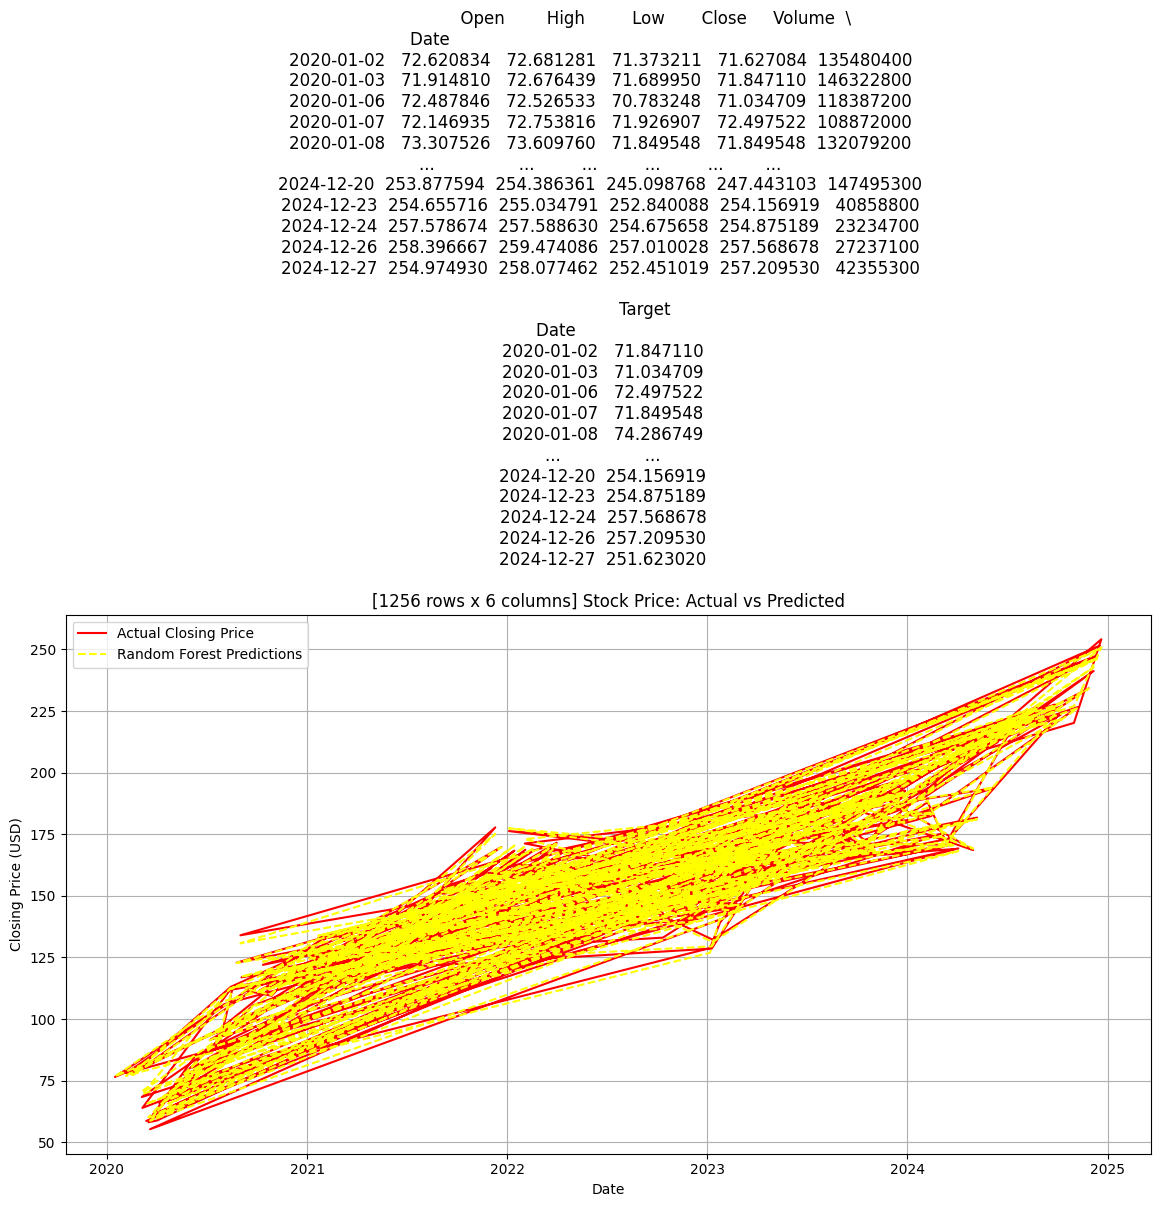

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(Y_test.index, Y_test, label='Actual Closing Price', color='red')
plt.plot(Y_test.index, y_pred, label='Random Forest Predictions', color='yellow', linestyle='--')
plt.title(f'{stock} Stock Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()